## SC1015 Mini Assignment Team 8
#### William Johnson U2220859A
#### Soo Ying Xi U2220021D
#### Tay Zhi Xian U2220099F
------------------------------------

#### Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score,precision_score,recall_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

#Shows plots by default
%matplotlib inline

------------------------------------------
#### Importing the dataset

In [2]:
creditcardData=pd.read_csv("credit-approval_csv.csv")
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [3]:
creditcardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           678 non-null    object 
 1   Age              678 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          684 non-null    object 
 4   BankCustomer     684 non-null    object 
 5   EducationLevel   681 non-null    object 
 6   Ethnicity        681 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          677 non-null    float64
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
 16  Approved_Status  690 non-null    object 
dtypes: float64(4), i

#### Observations
1. There are `17` variables in total and `690` observations in the dataset. Approved_Status is the response variable
2.  The remaining 15 variables are likely predictors (We've excluded Approved as it is the same as Approved_Status)
3. There are `2` variables identified as `int64` by default, and it seems they are all Numeric with the exception of `CreditScore - Categorical`.
4. There are `4` variables identified as `float64` by default, and it seems they are indeed Numeric.     
5. There are `9` variables identified as `object` by default, and they are most likely Categorical (Excluding `Approved`) 

6. There are some NULL values in the dataset, we need to explore more on those predictors to decide:
- To drop all the NULL values   OR
- fill the NULL values with median or mode

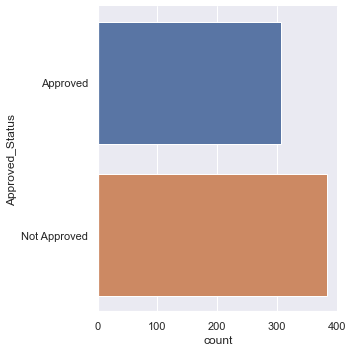

In [4]:
sb.catplot(y="Approved_Status",data=creditcardData,kind="count")

In [5]:
No_notapproved,No_approved=creditcardData["Approved_Status"].value_counts()
print("Ratio of Approved:Not_Approved=",No_approved,":",No_notapproved)
print("Approved percentage: {0:.2f} %".format((No_approved/(No_notapproved+No_approved))*100))

Ratio of Approved:Not_Approved= 307 : 383
Approved percentage: 44.49 %


We see that the percentage of approved credit card is  44.49%, which is slightly less than 50%. Generally it seems that response variable is balanced. Next, we will need to explore the data to identify each variables' relation with Approved_Status.

---

### Exploratory Data Analysis

#### Exploring the numerical variables

In [6]:
creditcardData.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


Exploration of variable `Debt`

<AxesSubplot:xlabel='Debt', ylabel='Approved_Status'>

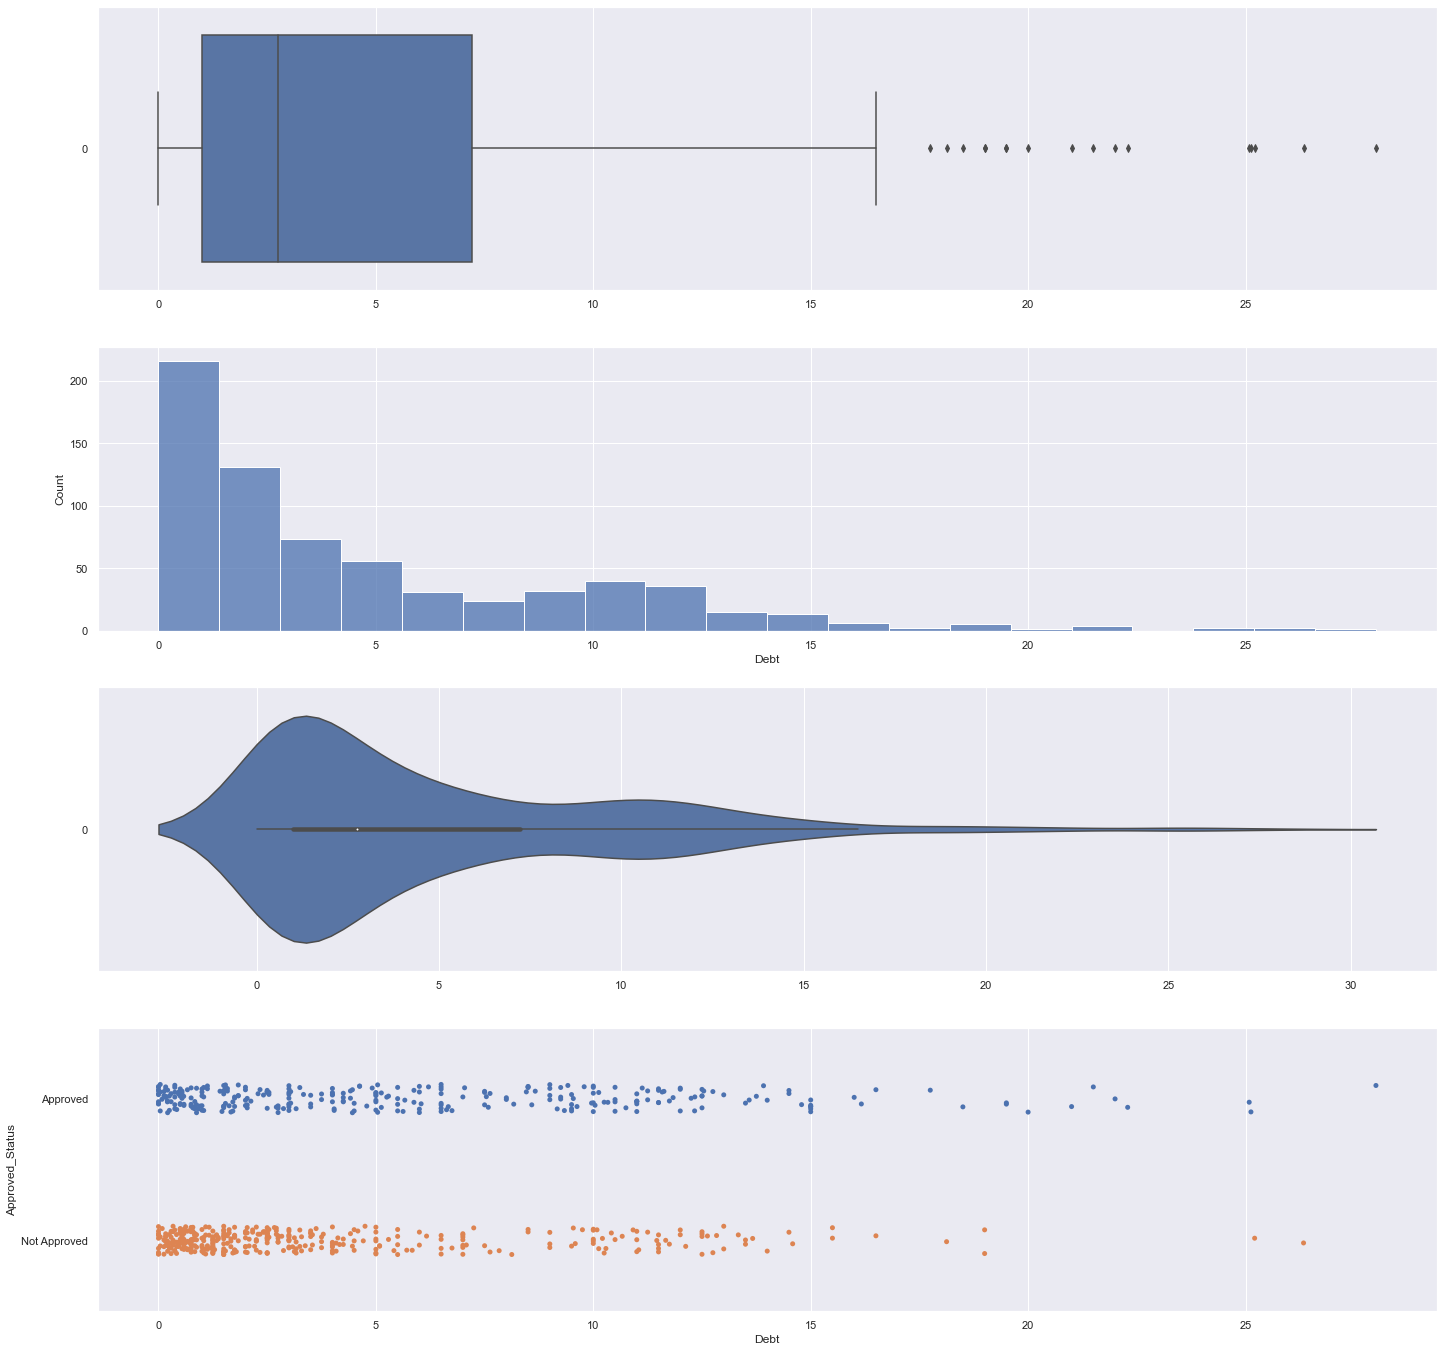

In [7]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Debt'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Debt'], ax = axes[1])
sb.violinplot(data = creditcardData['Debt'], orient = "h", ax = axes[2])
sb.stripplot(x = 'Debt', y = 'Approved_Status', data = creditcardData, ax = axes[3])

From the strip plot, while there are less approved applicants with a higher `Debt`, the general trend for both `Approved` and `Not Approved` are similar.
This variable does not seem to have a strong relationship with `Approved_Status`.

Exploration of variable `YearsEmployed`

<AxesSubplot:xlabel='YearsEmployed', ylabel='Approved_Status'>

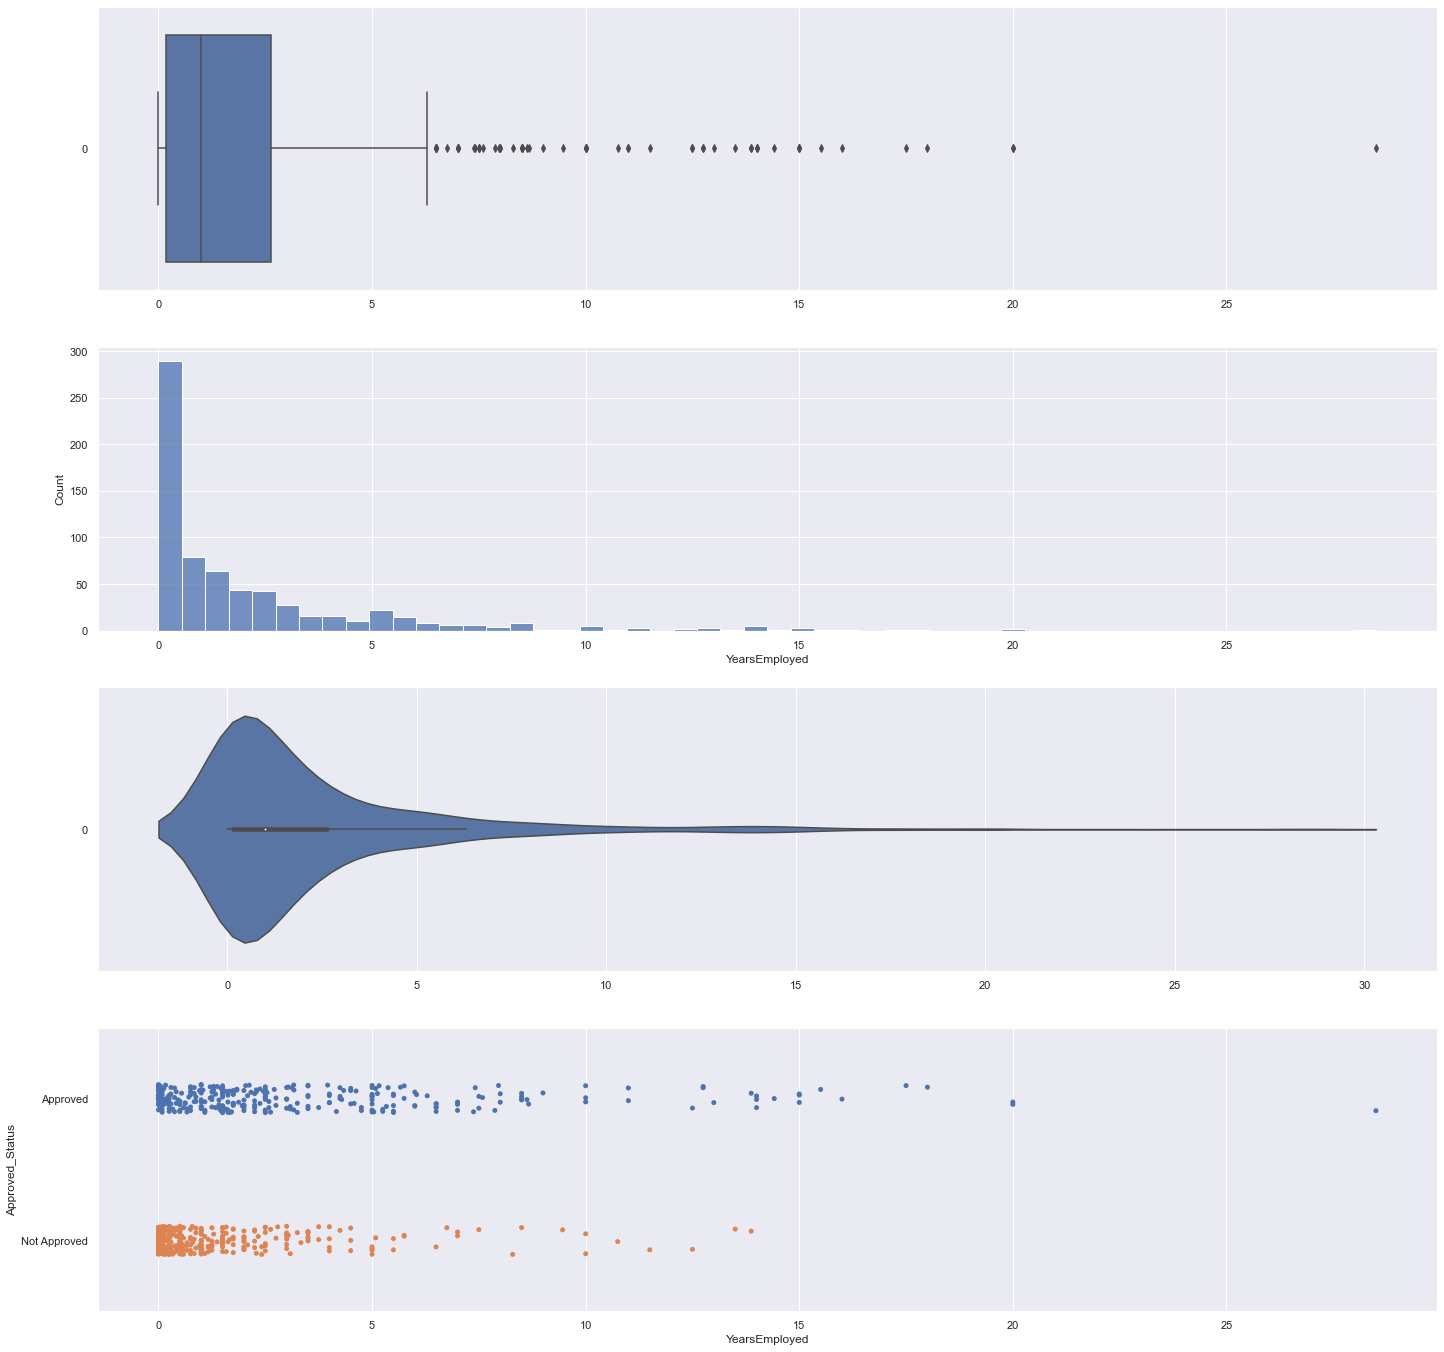

In [8]:
# Plot basic uni-variate figures
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['YearsEmployed'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['YearsEmployed'], ax = axes[1])
sb.violinplot(data = creditcardData['YearsEmployed'], orient = "h", ax = axes[2])
sb.stripplot(x = 'YearsEmployed', y = 'Approved_Status', data = creditcardData, ax = axes[3])

In [9]:
MaxNotApprovedYE = creditcardData[creditcardData['Approved_Status'] == 'Not Approved']['YearsEmployed'].max()
print("The largest YearsEmployed value in Not Approved is:", MaxNotApprovedYE)

The largest YearsEmployed value in Not Approved is: 13.875


From the strip plot, there are significantly more approved applicants with a higher `YearsEmployed`. In addition, `Not Approved` applicants only have a maximum of ~14 years of employment, suggesting a strong relationship between `YearsEmployed` and `Approved_Status`.

Exploration of variable `Age`

<AxesSubplot:xlabel='Age', ylabel='Approved_Status'>

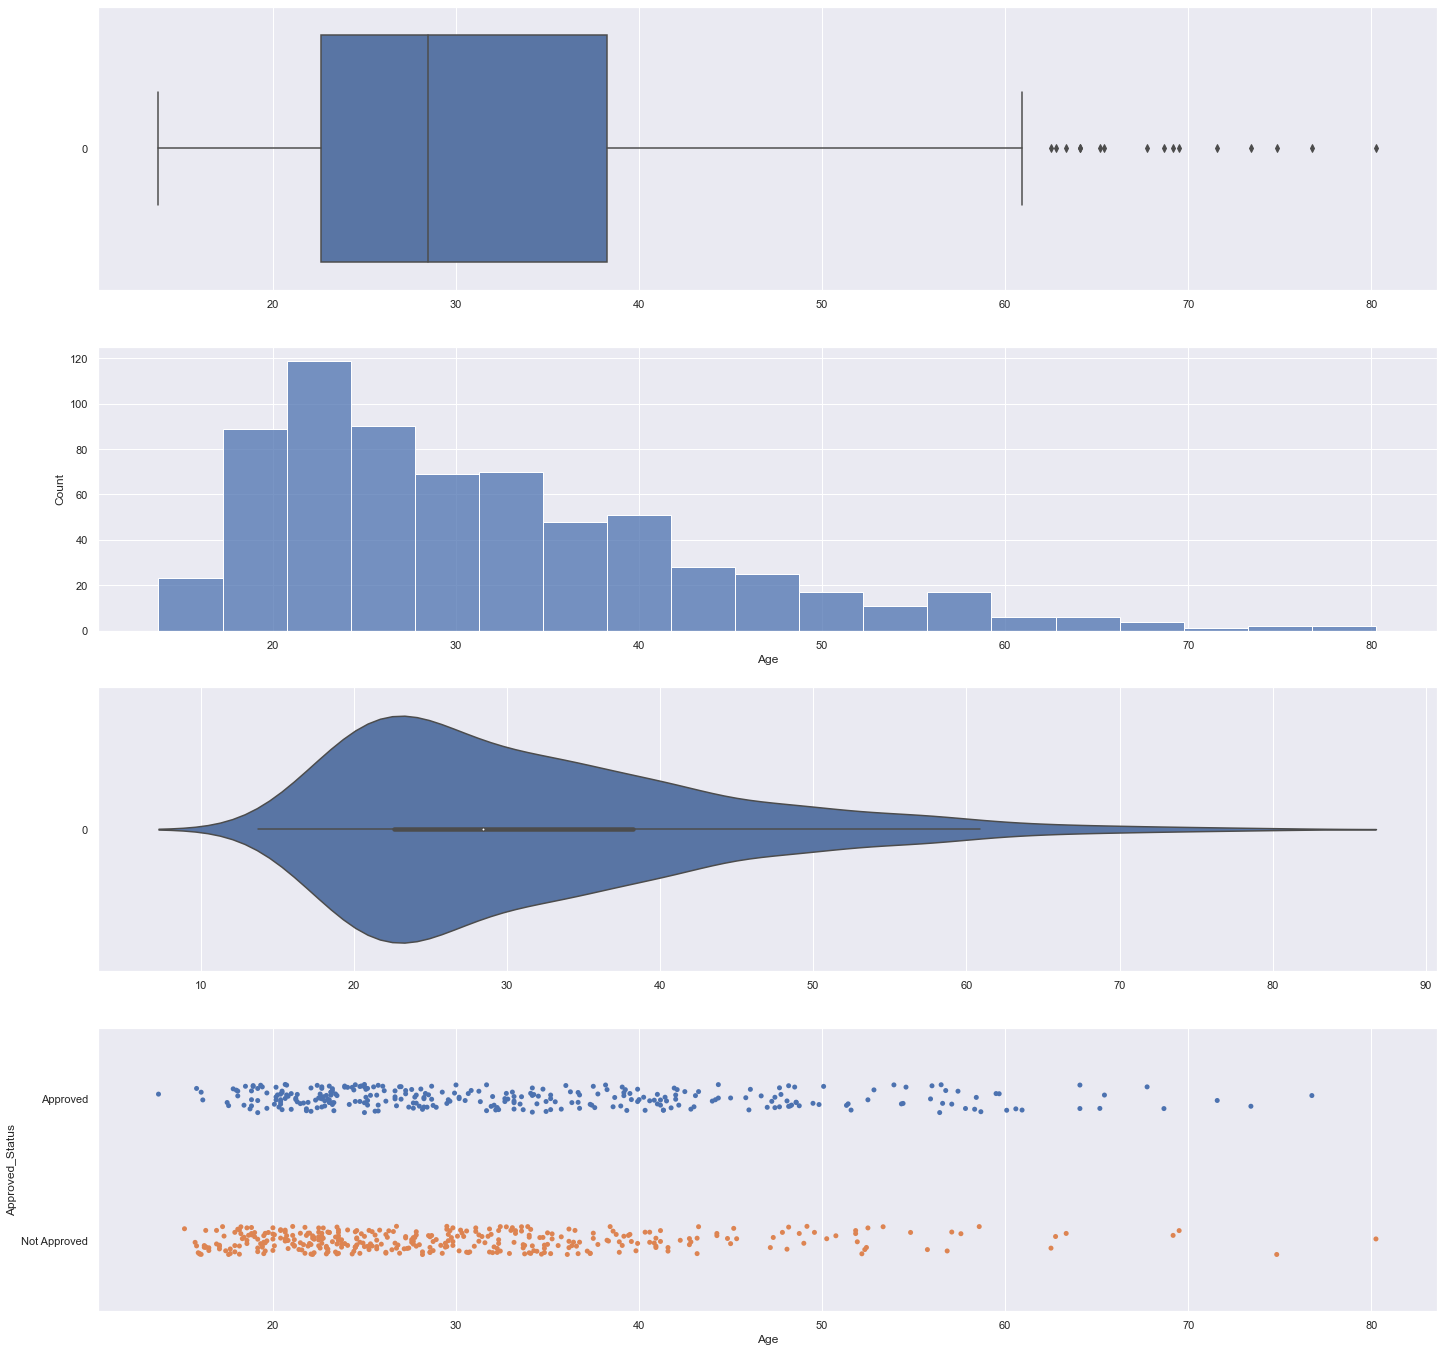

In [10]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Age'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Age'], ax = axes[1])
sb.violinplot(data = creditcardData['Age'], orient = "h", ax = axes[2])
sb.stripplot(x = 'Age', y = 'Approved_Status', data = creditcardData, ax = axes[3])

From the strip plot, while there are slightly less approved applicants with a higher `Age`, the general trend for both `Approved` and `Not Approved` are similar.
This variable does not seem to have a strong relationship with `Approved_Status`.

Exploration of variable `CreditScore`

<AxesSubplot:xlabel='CreditScore', ylabel='Approved_Status'>

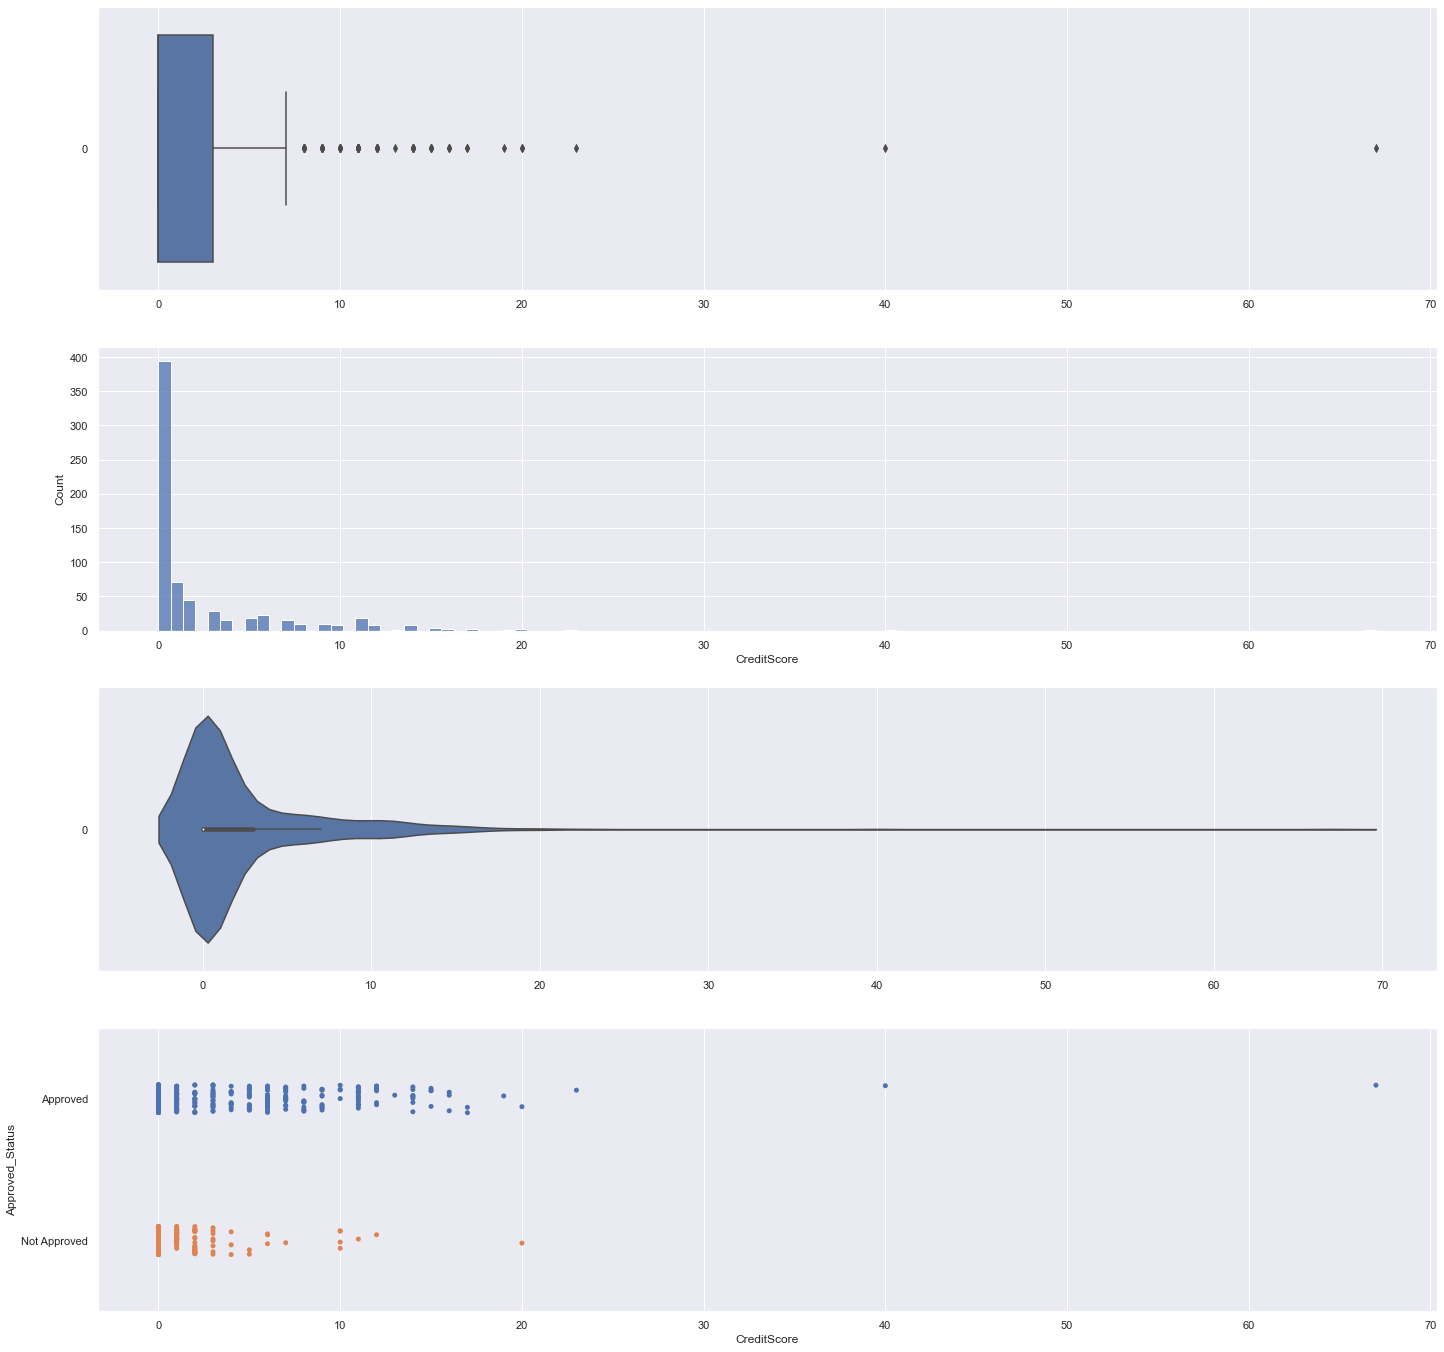

In [11]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['CreditScore'],orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['CreditScore'], ax = axes[1])
sb.violinplot(data = creditcardData['CreditScore'], orient = "h", ax = axes[2])
sb.stripplot(data=creditcardData,x="CreditScore",y="Approved_Status", ax = axes[3])

From the strip plot, it is obvious that there is a strong relationship between `CreditScore` and `Approved_Status`.

<AxesSubplot:xlabel='Income', ylabel='Approved_Status'>

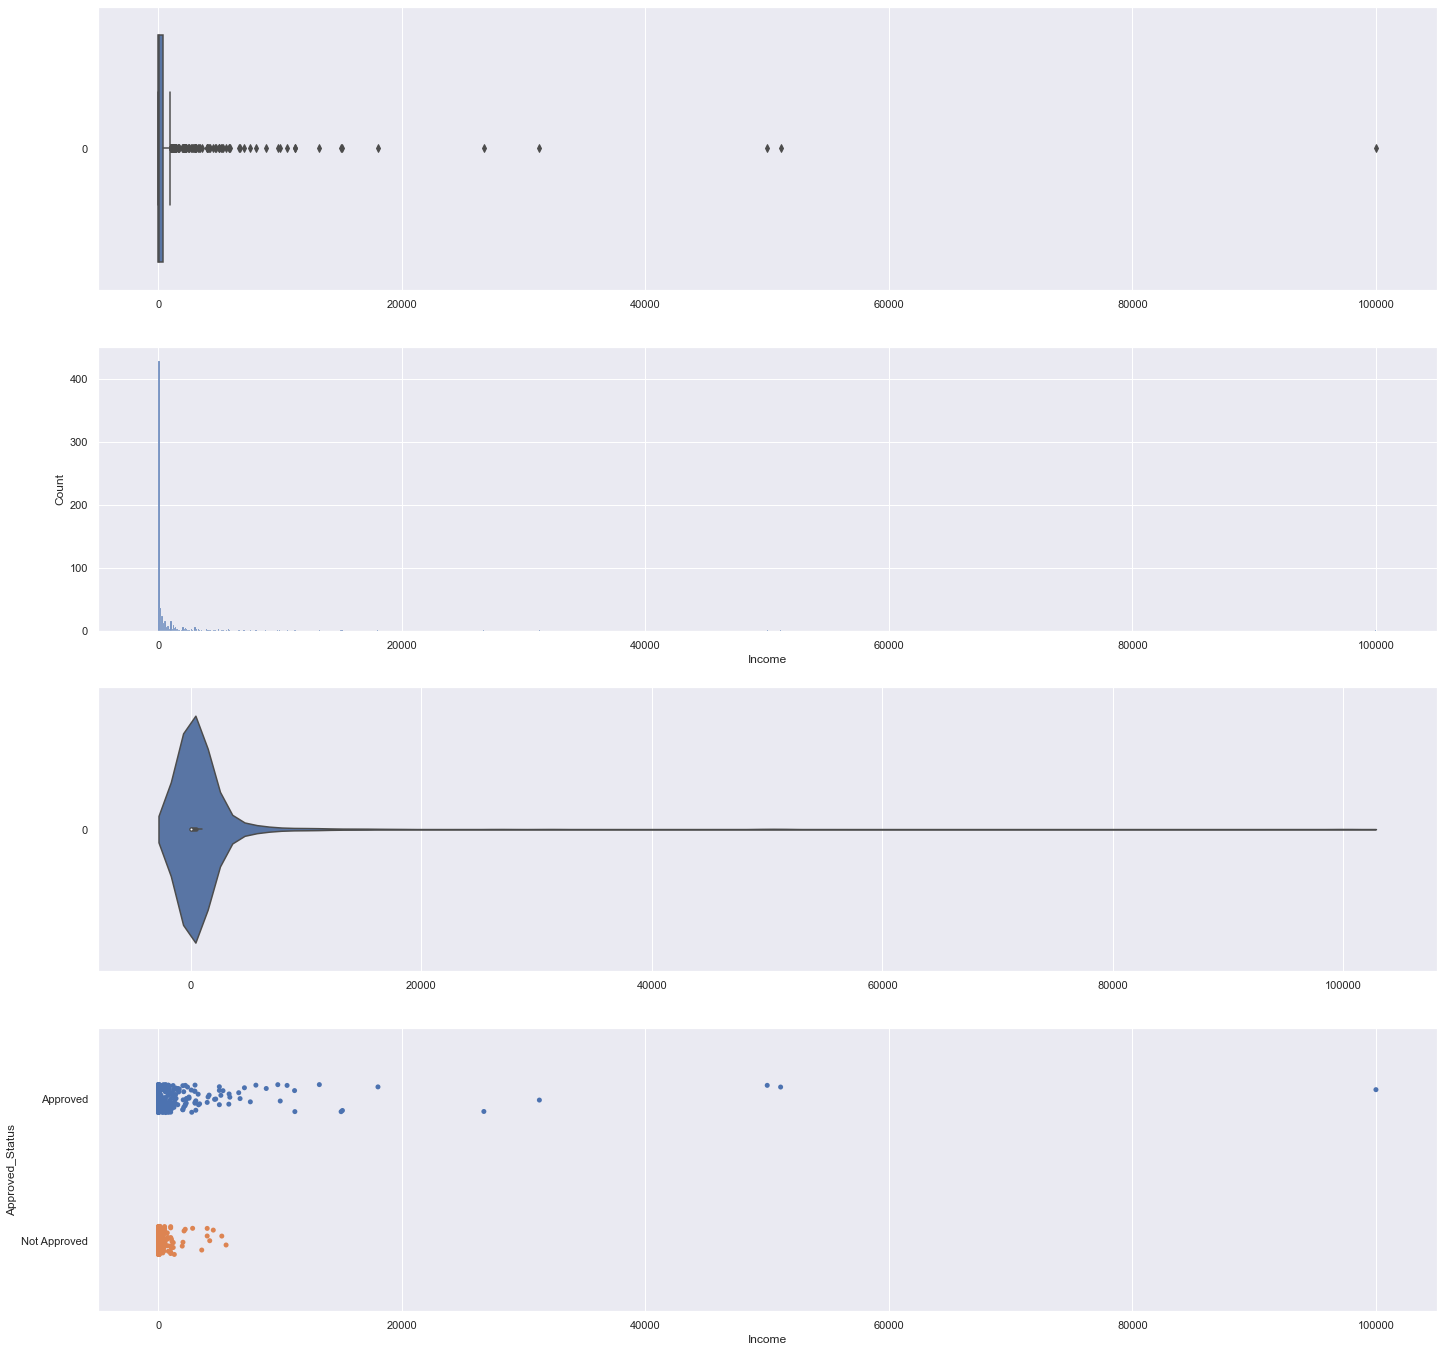

In [12]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Income'],orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Income'], ax = axes[1])
sb.violinplot(data = creditcardData['Income'], orient = "h", ax = axes[2])
sb.stripplot(data=creditcardData,x="Income",y="Approved_Status", ax = axes[3])

The plots do not scale well with the figsize due to the presence of a strong `Income` outliers. We will re-plot without the outliers just to better identify a trend.

<AxesSubplot:xlabel='Income', ylabel='Approved_Status'>

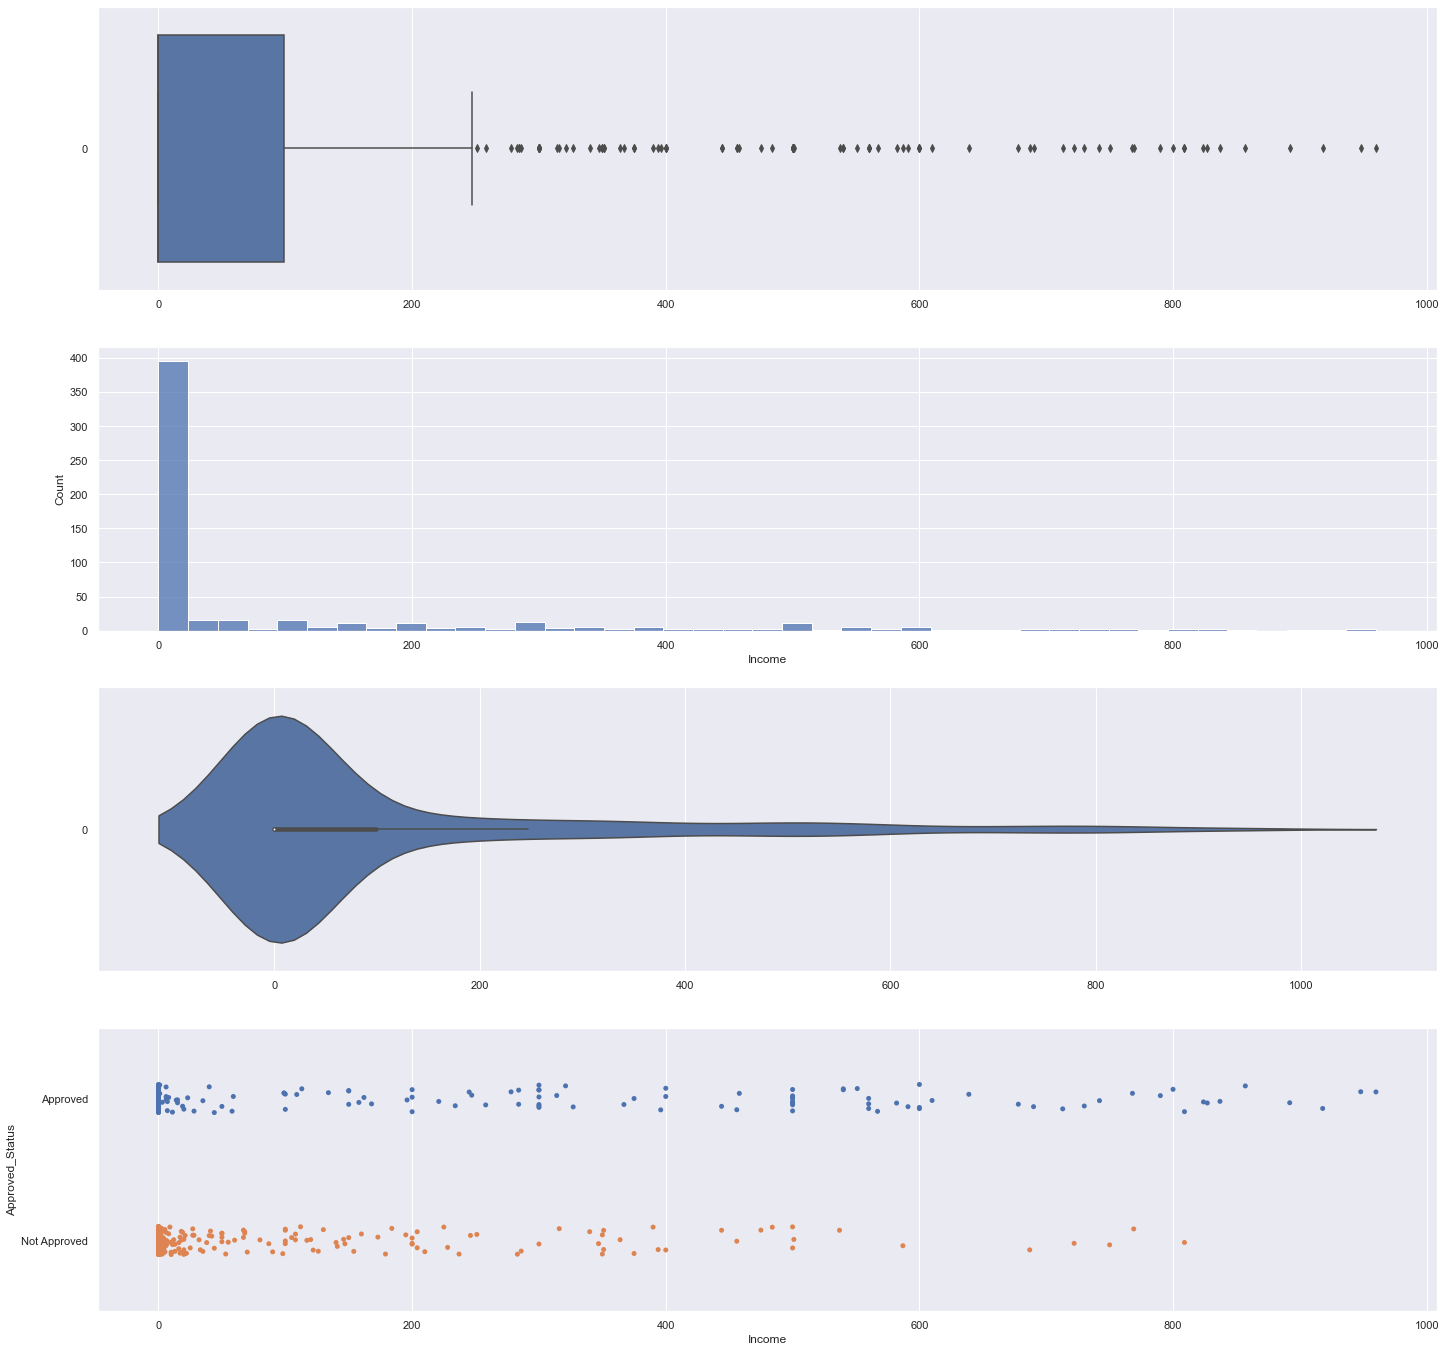

In [13]:
Q1 = creditcardData["Income"].quantile(0.25)
Q3 = creditcardData["Income"].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
IncomeMinusOutlier = creditcardData[(creditcardData["Income"] > lower_bound) & (creditcardData["Income"] < upper_bound)]
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = IncomeMinusOutlier['Income'],orient = "h", ax = axes[0])
sb.histplot(data = IncomeMinusOutlier['Income'], ax = axes[1])
sb.violinplot(data = IncomeMinusOutlier['Income'], orient = "h", ax = axes[2])
sb.stripplot(data=IncomeMinusOutlier,x="Income",y="Approved_Status", ax = axes[3])

From the strip plot, there seems to be a strong relationship between `Income` and `Approved_Status` as there are several more `Not Approved` applicants with a lower income.

#### Exploring the categorical variables

In [14]:
creditcardDataStr = creditcardData.loc[:, creditcardData.dtypes == object]
creditcardDataStr.describe()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
count,678,684,684,681,681,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2,2
top,b,u,g,c,v,t,f,f,g,-,Not Approved
freq,468,519,519,137,399,361,395,374,625,383,383


In [15]:
print("Discovering the values of Married")
creditcardData["Married"].value_counts()

Discovering the values of Married


u    519
y    163
l      2
Name: Married, dtype: int64

In [16]:
print("Discovering the values of Citizen")
creditcardData["Citizen"].value_counts()

Discovering the values of Citizen


g    625
s     57
p      8
Name: Citizen, dtype: int64

In [17]:
print("Discovering the values of EducationLevel")
creditcardData["EducationLevel"].value_counts()

Discovering the values of EducationLevel


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [18]:
print("Discovering the values of Ethnicity")
creditcardData["Ethnicity"].value_counts()

Discovering the values of Ethnicity


v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

Variables `EducationLevel` and `Ethnicity` have too many ambiguous values. After checking the dataset source, we know that most applicants do not want to disclose these sensitive information. Therefore, we will drop this variables out of our predictors.

In [19]:
# Drop EducationalLevel and Ethnicity
todrop=["EducationLevel","Ethnicity"]
ccData=creditcardData.drop(columns=todrop)
ccData.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,1.71,t,f,0,f,s,120.0,0,+,Approved


Relationship between Gender and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='Gender'>

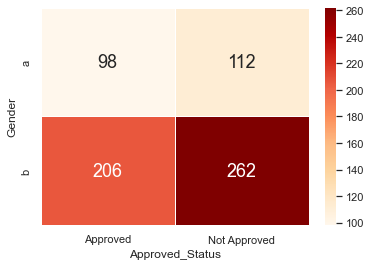

In [20]:
sb.heatmap(ccData.groupby(['Gender','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

From the heatmap, it does not seem that `Gender` strongly affects `Approved_Status` as the values are somewhat balanced for both `Approved` and `Not Approved`.

Relationship between Married and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='Married'>

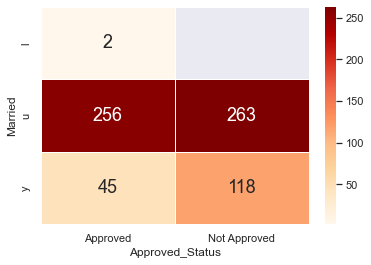

In [21]:
sb.heatmap(creditcardDataStr.groupby(['Married','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

From the heatmap, while there are more `y` applicants who were not approved, the `u` applicants see a good balance. With further consideration, we deemed that `Married` should not strongly affect `Approved_Status`.

Relationship between Drivers License and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='DriversLicense'>

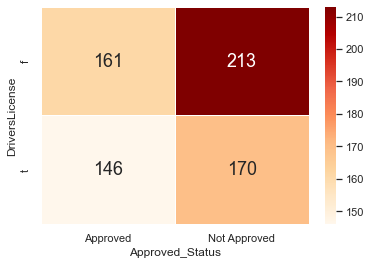

In [22]:
sb.heatmap(creditcardDataStr.groupby(['DriversLicense','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

From the heatmap, it does not seem that `DriversLicense` strongly affects `Approved_Status` as the values are somewhat balanced for both `Approved` and `Not Approved`.

Relationship between Citizen and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='Citizen'>

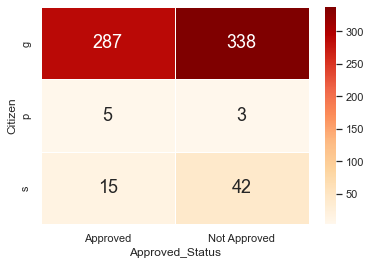

In [23]:
sb.heatmap(creditcardDataStr.groupby(['Citizen','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

From the heatmap, it does not seem that `Citizen` strongly affects `Approved_Status` as the values are somewhat balanced for both `Approved` and `Not Approved`.

Relationship between PriorDefault and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='PriorDefault'>

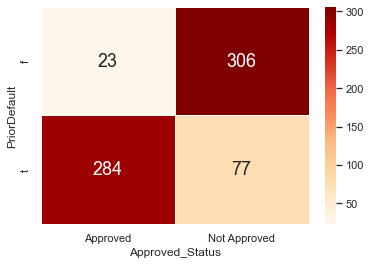

In [24]:
sb.heatmap(ccData.groupby(['PriorDefault','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

It is obvious that there is a very strong relationship with `PriorDefault` and `Approved_Status`, this variable should definitely be considered for model training.

Relationship between Employed and Approval Status

<AxesSubplot:xlabel='Approved_Status', ylabel='Employed'>

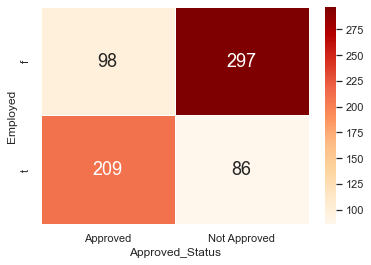

In [25]:
sb.heatmap(ccData.groupby(['Employed','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

Similarly, there is also a very strong relationship with `Employed` and `Approved_Status`, this variable should also be considered for model training.

---

## Essential Functions for model training 

Train test split

In [26]:
def train_test_split_func(X,y,test_size): # This function retunrs X_train,X_test,y_train,y_test as a list

    data = list(train_test_split(X,y,test_size=test_size))
    print(f'X_train: {data[0].shape}')
    print(f'X_test: {data[1].shape}')
    print(f'y_train: {data[2].shape}')
    print(f'y_test: {data[3].shape}')

    return data 

Random Forest

In [27]:
def randomforest( rforest, X_train,X_test, y_train,y_test):    
    rforest.fit(X_train,y_train.Approved_Status.ravel())
    y_train_pred = rforest.predict(X_train)    
    y_test_pred = rforest.predict(X_test)
    print("Train Data")
    print("Accuracy  :\t", rforest.score(X_train, y_train))    
    print()
    print("Test Data")
    print("Accuracy  :\t", rforest.score(X_test, y_test))    
    print()
    return y_train_pred,y_test_pred

Logisitic Regression

In [28]:
def logistic_regression(model,X_train,X_test,y_train,y_test):  # This function returns the y_train_predict and the y_test_predict
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = model.score(X_train,y_train)
    accuracy_test = accuracy_score(y_test,y_test_pred)

    print(f'Train Accuracy: {accuracy_train}')
    print(f" Test Accuracy: {accuracy_test}")
    return y_train_pred,y_test_pred 

Confusion matrix

In [29]:
def confusion_matrix_func(y_test,y_test_pred,type):

    sb.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f", annot_kws={"size": 18})

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives 
    fpTest = cmTest[0][1] # False Positives 
    tnTest = cmTest[0][0] # True Negatives 
    fnTest = cmTest[1][0] # False Negatives 

    print(f"TPR {type} :\t", (tpTest/(tpTest + fnTest)))
    print(f"TNR {type} :\t", (tnTest/(tnTest + fpTest)))
    print()

    print(f"FPR {type} :\t", (fpTest/(fpTest + tnTest)))
    print(f"FNR {type} :\t", (fnTest/(fnTest + tpTest)))
    print()

    precision_test_rf = precision_score(y_test,y_test_pred, pos_label = 'Approved')
    recall_test_rf = recall_score(y_test,y_test_pred, pos_label = 'Approved')
    f1_test_rf = f1_score(y_test,y_test_pred, pos_label='Approved')
    print("Precision: {0:.4f}" .format(precision_test_rf)) 
    print("Recall: {0:.4f}" .format(recall_test_rf))
    print("F-score: {0:.4f}" .format(f1_test_rf))

### Seems like employed , prior_default , credit_score(num) , years_employed and debt(mayb) are those really important predictors as in this dataset

In [30]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Gender','Married','Employed','DriversLicense','PriorDefault','DriversLicense','Citizen']]
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))

# Check the encoded variables
ccData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender_a          690 non-null    float64
 1   Gender_b          690 non-null    float64
 2   Gender_nan        690 non-null    float64
 3   Married_l         690 non-null    float64
 4   Married_u         690 non-null    float64
 5   Married_y         690 non-null    float64
 6   Married_nan       690 non-null    float64
 7   Employed_f        690 non-null    float64
 8   Employed_t        690 non-null    float64
 9   DriversLicense_f  690 non-null    float64
 10  DriversLicense_t  690 non-null    float64
 11  PriorDefault_f    690 non-null    float64
 12  PriorDefault_t    690 non-null    float64
 13  DriversLicense_f  690 non-null    float64
 14  DriversLicense_t  690 non-null    float64
 15  Citizen_g         690 non-null    float64
 16  Citizen_p         690 non-null    float64
 1

In [31]:
# Combining Numeric features with the OHE Categorical features
ccData_num = ccData[['Age','YearsEmployed','Income','Debt','CreditScore']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)
ccData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 689
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               678 non-null    float64
 1   YearsEmployed     678 non-null    float64
 2   Income            678 non-null    int64  
 3   Debt              678 non-null    float64
 4   CreditScore       678 non-null    int64  
 5   Gender_a          678 non-null    float64
 6   Gender_b          678 non-null    float64
 7   Gender_nan        678 non-null    float64
 8   Married_l         678 non-null    float64
 9   Married_u         678 non-null    float64
 10  Married_y         678 non-null    float64
 11  Married_nan       678 non-null    float64
 12  Employed_f        678 non-null    float64
 13  Employed_t        678 non-null    float64
 14  DriversLicense_f  678 non-null    float64
 15  DriversLicense_t  678 non-null    float64
 16  PriorDefault_f    678 non-null    float64
 1

[Text(0.6066176470588235, 0.9166666666666666, 'PriorDefault_f <= 0.5\ngini = 0.493\nsamples = 474\nvalue = [209, 265]\nclass = Y'),
 Text(0.3602941176470588, 0.75, 'Employed_f <= 0.5\ngini = 0.35\nsamples = 252\nvalue = [195, 57]\nclass = N'),
 Text(0.22058823529411764, 0.5833333333333334, 'Income <= 215.5\ngini = 0.175\nsamples = 155\nvalue = [140, 15]\nclass = N'),
 Text(0.11764705882352941, 0.4166666666666667, 'YearsEmployed <= 1.418\ngini = 0.334\nsamples = 66\nvalue = [52, 14]\nclass = N'),
 Text(0.058823529411764705, 0.25, 'CreditScore <= 3.5\ngini = 0.483\nsamples = 22\nvalue = [13, 9]\nclass = N'),
 Text(0.029411764705882353, 0.08333333333333333, 'gini = 0.473\nsamples = 13\nvalue = [5, 8]\nclass = Y'),
 Text(0.08823529411764706, 0.08333333333333333, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = N'),
 Text(0.17647058823529413, 0.25, 'Age <= 29.21\ngini = 0.201\nsamples = 44\nvalue = [39, 5]\nclass = N'),
 Text(0.14705882352941177, 0.08333333333333333, 'gini = 0.346\nsampl

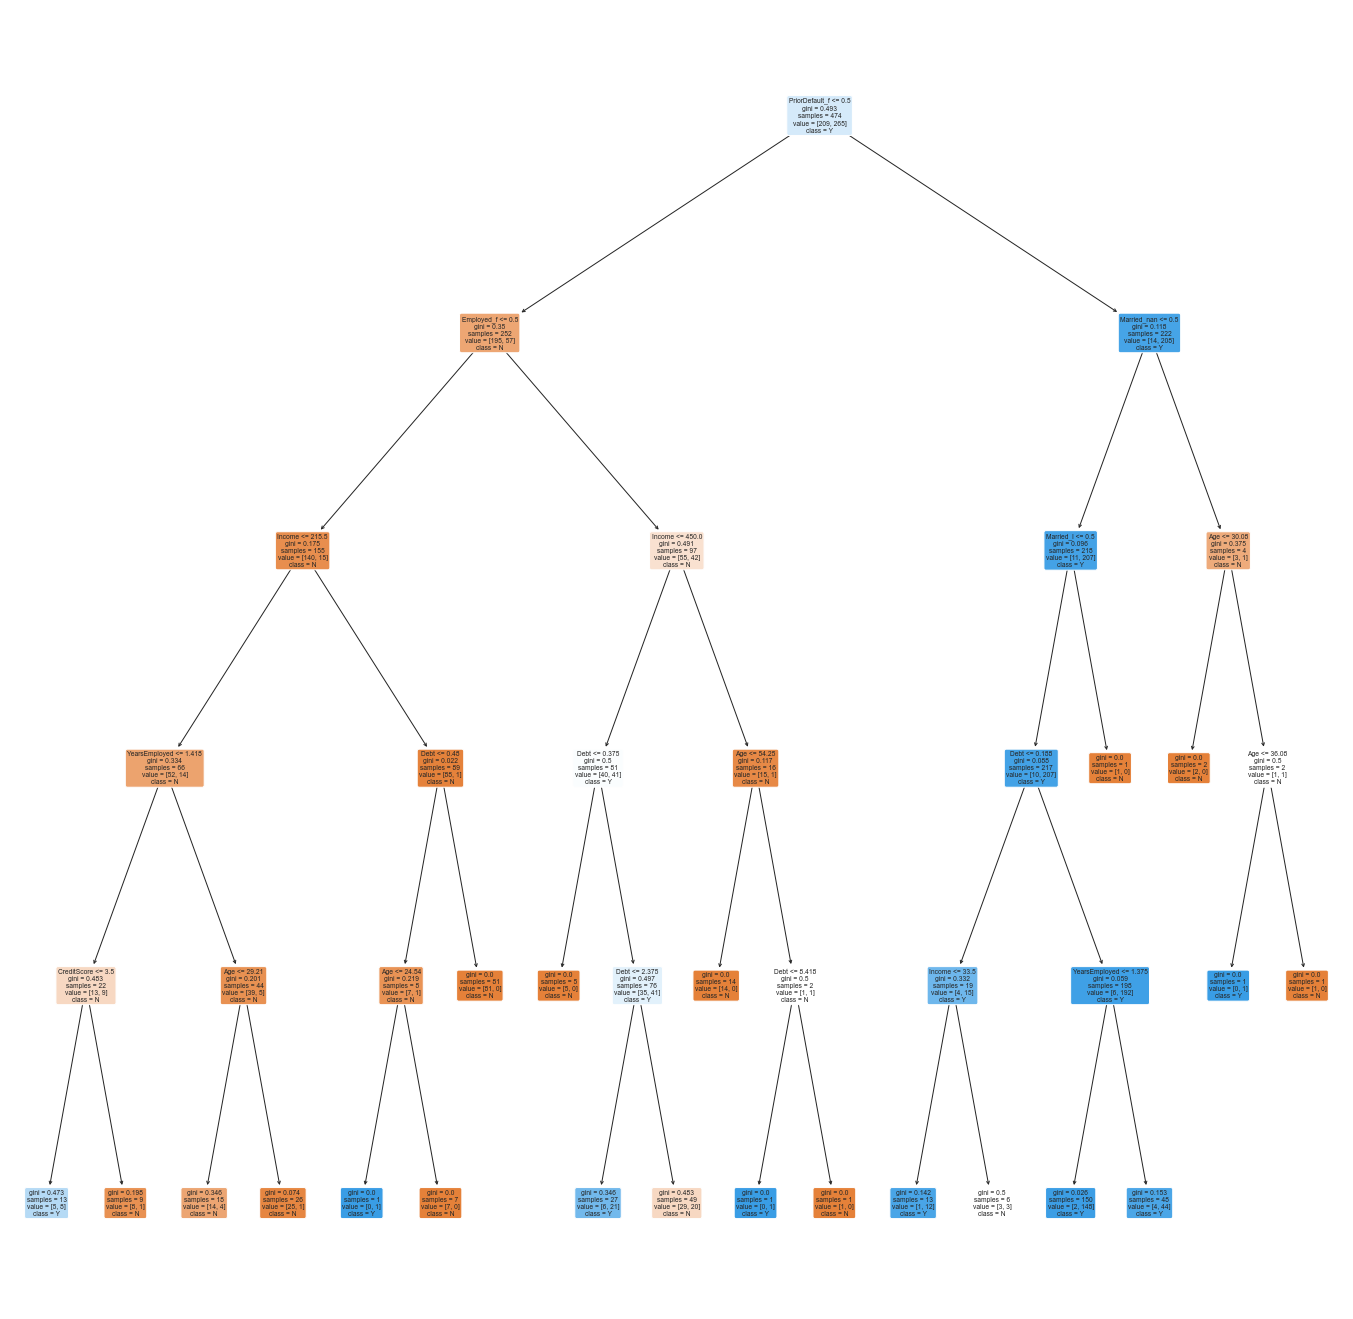

In [32]:
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9008438818565401

TPR Train :	 0.8905660377358491
TNR Train :	 0.9138755980861244

FPR Train :	 0.0861244019138756
FNR Train :	 0.10943396226415095

Precision: 0.8682
Recall: 0.9139
F-score: 0.8904


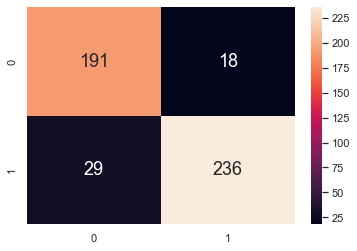

In [33]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
confusion_matrix_func(y_train,y_train_pred,'Train')

Test Data
Accuracy  :	 0.8578431372549019

TPR Test :	 0.9074074074074074
TNR Test :	 0.8020833333333334

FPR Test :	 0.19791666666666666
FNR Test :	 0.09259259259259259

Precision: 0.8851
Recall: 0.8021
F-score: 0.8415


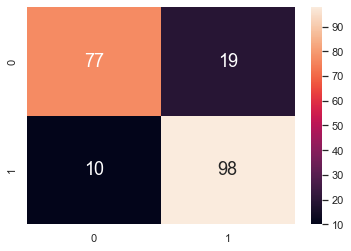

In [34]:
# Import the required metric from sklearn


# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

confusion_matrix_func(y_test,y_test_pred,'Test')

---

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators=500, max_depth=5)
y_train_pred, y_test_pred = randomforest(rforest,X_train, X_test, y_train, y_test)

Train Data
Accuracy  :	 0.9050632911392406

Test Data
Accuracy  :	 0.8725490196078431



TPR Train :	 0.9053030303030303
TNR Train :	 0.9047619047619048

FPR Train :	 0.09523809523809523
FNR Train :	 0.0946969696969697

Precision: 0.8837
Recall: 0.9048
F-score: 0.8941


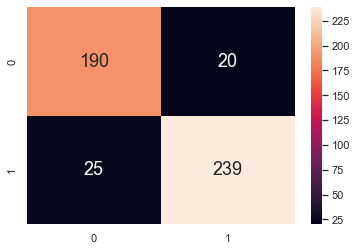

In [36]:
# Predict the Response corresponding to Predictors
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.8623853211009175
TNR Test :	 0.8842105263157894

FPR Test :	 0.11578947368421053
FNR Test :	 0.13761467889908258

Precision: 0.8485
Recall: 0.8842
F-score: 0.8660


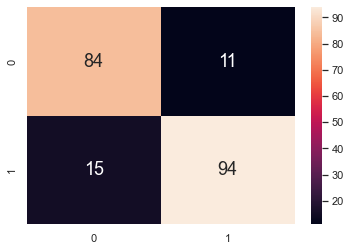

In [37]:
confusion_matrix_func(y_test,y_test_pred,'Test')

---

In [38]:
# Extract Response and Predictors
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [39]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Approved_Status.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [40]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=2, n_estimators=400)
0.8608062709966406


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators=hpGrid.best_estimator_.n_estimators, max_depth=hpGrid.best_estimator_.max_depth)
y_train_pred, y_test_pred = randomforest(rforest,X_train, X_test, y_train, y_test)

Train Data
Accuracy  :	 0.8670886075949367

Test Data
Accuracy  :	 0.8480392156862745



# -------------------------------------------------------------------

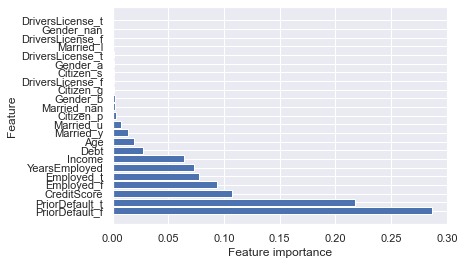

In [42]:
# Get feature importances
importances = rforest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create horizontal bar chart
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()


In [43]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Employed','PriorDefault']]
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))

# Check the encoded variables
ccData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Employed_f      690 non-null    float64
 1   Employed_t      690 non-null    float64
 2   PriorDefault_f  690 non-null    float64
 3   PriorDefault_t  690 non-null    float64
dtypes: float64(4)
memory usage: 21.7 KB


In [44]:
# Combining Numeric features with the OHE Categorical features
ccData_num = ccData[['CreditScore','YearsEmployed','Income','Debt']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)
ccData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      690 non-null    int64  
 1   YearsEmployed    690 non-null    float64
 2   Income           690 non-null    int64  
 3   Debt             690 non-null    float64
 4   Employed_f       690 non-null    float64
 5   Employed_t       690 non-null    float64
 6   PriorDefault_f   690 non-null    float64
 7   PriorDefault_t   690 non-null    float64
 8   Approved_Status  690 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 48.6+ KB


In [45]:
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

rforest2 = RandomForestClassifier(n_estimators=500, max_depth=4)

y_train_pred,y_test_pred = randomforest( rforest2,X_train, X_test, y_train, y_test )
# rforest2.fit(X_train,y_train.Approved_Status.ravel())

Train Data
Accuracy  :	 0.8881987577639752

Test Data
Accuracy  :	 0.8647342995169082



TPR Train :	 0.8962962962962963
TNR Train :	 0.8779342723004695

FPR Train :	 0.12206572769953052
FNR Train :	 0.1037037037037037

Precision: 0.8698
Recall: 0.8779
F-score: 0.8738


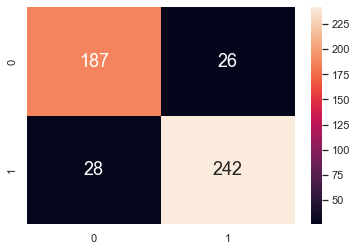

In [46]:
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.9203539823008849
TNR Test :	 0.7978723404255319

FPR Test :	 0.20212765957446807
FNR Test :	 0.07964601769911504

Precision: 0.8929
Recall: 0.7979
F-score: 0.8427


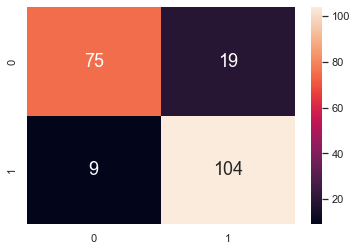

In [47]:
confusion_matrix_func(y_test,y_test_pred,'Test')

From here we found that Debt, Age, Income, YearsEmployed (num), Employed, PriorDefault(cat) are important factors.
Make Sense! 


In [48]:
# Extract Response and Predictors
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [49]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Approved_Status.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [50]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=6, n_estimators=700)
0.8613831615120275


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators=hpGrid.best_estimator_.n_estimators, max_depth=hpGrid.best_estimator_.max_depth)
y_train_pred, y_test_pred = randomforest(rforest,X_train, X_test, y_train, y_test)

Train Data
Accuracy  :	 0.9130434782608695

Test Data
Accuracy  :	 0.8502415458937198



# ------------------------------------------------------------------------

# Logistic Regression

In [52]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Employed','PriorDefault']]
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))


ccData_num = ccData[['CreditScore','YearsEmployed','Income','Debt']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)

y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

y = y.squeeze()

In [53]:
# Split the Dataset into Train and Test
X_train, X_test, y_train ,y_test =train_test_split(X,y,test_size=0.3)

In [54]:
# Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [55]:
X_train_scaled

array([[-0.47782118,  0.24950752, -0.17828947, ..., -0.8660254 ,
         1.04014256, -1.04014256],
       [-0.47782118, -0.30206637, -0.18112105, ..., -0.8660254 ,
        -0.96140667,  0.96140667],
       [ 0.47427301, -0.26449322,  0.01301872, ...,  1.15470054,
        -0.96140667,  0.96140667],
       ...,
       [-0.47782118, -0.65224816,  0.01531937, ..., -0.8660254 ,
         1.04014256, -1.04014256],
       [-0.47782118, -0.12622401, -0.18112105, ..., -0.8660254 ,
        -0.96140667,  0.96140667],
       [-0.47782118, -0.60265159, -0.18112105, ..., -0.8660254 ,
         1.04014256, -1.04014256]])

In [56]:
model = LogisticRegression()
y_train_pred,y_test_pred =  logistic_regression(model,X_train_scaled,X_test_scaled,y_train,y_test)

Train Accuracy: 0.8530020703933747
 Test Accuracy: 0.8695652173913043


TPR Train :	 0.8014981273408239
TNR Train :	 0.9166666666666666

FPR Train :	 0.08333333333333333
FNR Train :	 0.19850187265917604

Precision: 0.7888
Recall: 0.9167
F-score: 0.8480


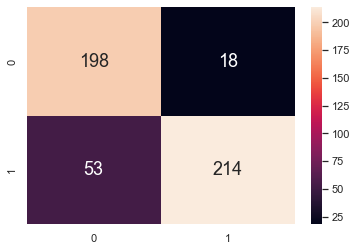

In [57]:
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.8017241379310345
TNR Test :	 0.9560439560439561

FPR Test :	 0.04395604395604396
FNR Test :	 0.19827586206896552

Precision: 0.7909
Recall: 0.9560
F-score: 0.8657


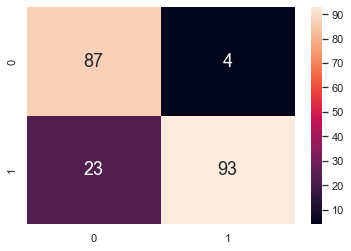

In [58]:
confusion_matrix_func(y_test,y_test_pred,'Test')

Scaled

----

## Additional Model (Resampling)

In [59]:
Approved = ccData_ohe[ccData_ohe.Approved_Status == 'Approved']
Not_Approved = ccData_ohe[ccData_ohe.Approved_Status == 'Not Approved']
 
# Upsample the Bad samples
Not_Approved_up = resample(Not_Approved, 
                        replace=True,                     # sample with replacement
                        n_samples=Approved.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
creditData_ohe_up = pd.concat([Approved, Not_Approved_up])
 
# Check the ratio of the classes
creditData_ohe_up['Approved_Status'].value_counts()

Approved        307
Not Approved    307
Name: Approved_Status, dtype: int64

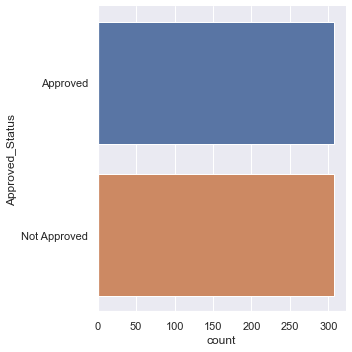

In [60]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'Approved_Status', data = creditData_ohe_up, kind = "count")

In [61]:
# Confirm that the OHE is still in place
# and that the samples have now increased
creditData_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 637
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      614 non-null    int64  
 1   YearsEmployed    614 non-null    float64
 2   Income           614 non-null    int64  
 3   Debt             614 non-null    float64
 4   Employed_f       614 non-null    float64
 5   Employed_t       614 non-null    float64
 6   PriorDefault_f   614 non-null    float64
 7   PriorDefault_t   614 non-null    float64
 8   Approved_Status  614 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 48.0+ KB


[Text(0.4375, 0.9, 'PriorDefault_t <= 0.5\ngini = 0.5\nsamples = 429\nvalue = [214, 215]\nclass = Not_Approved'),
 Text(0.20833333333333334, 0.7, 'Debt <= 0.062\ngini = 0.173\nsamples = 188\nvalue = [18, 170]\nclass = Not_Approved'),
 Text(0.125, 0.5, 'YearsEmployed <= 0.145\ngini = 0.492\nsamples = 16\nvalue = [7, 9]\nclass = Not_Approved'),
 Text(0.08333333333333333, 0.3, 'CreditScore <= 2.5\ngini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = Approved'),
 Text(0.041666666666666664, 0.1, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]\nclass = Approved'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Not_Approved'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Not_Approved'),
 Text(0.2916666666666667, 0.5, 'Income <= 52776.0\ngini = 0.12\nsamples = 172\nvalue = [11, 161]\nclass = Not_Approved'),
 Text(0.25, 0.3, 'YearsEmployed <= 1.375\ngini = 0.11\nsamples = 171\nvalue = [10, 161]\nclass = Not_Approved'),
 Text(0.2083333333333333

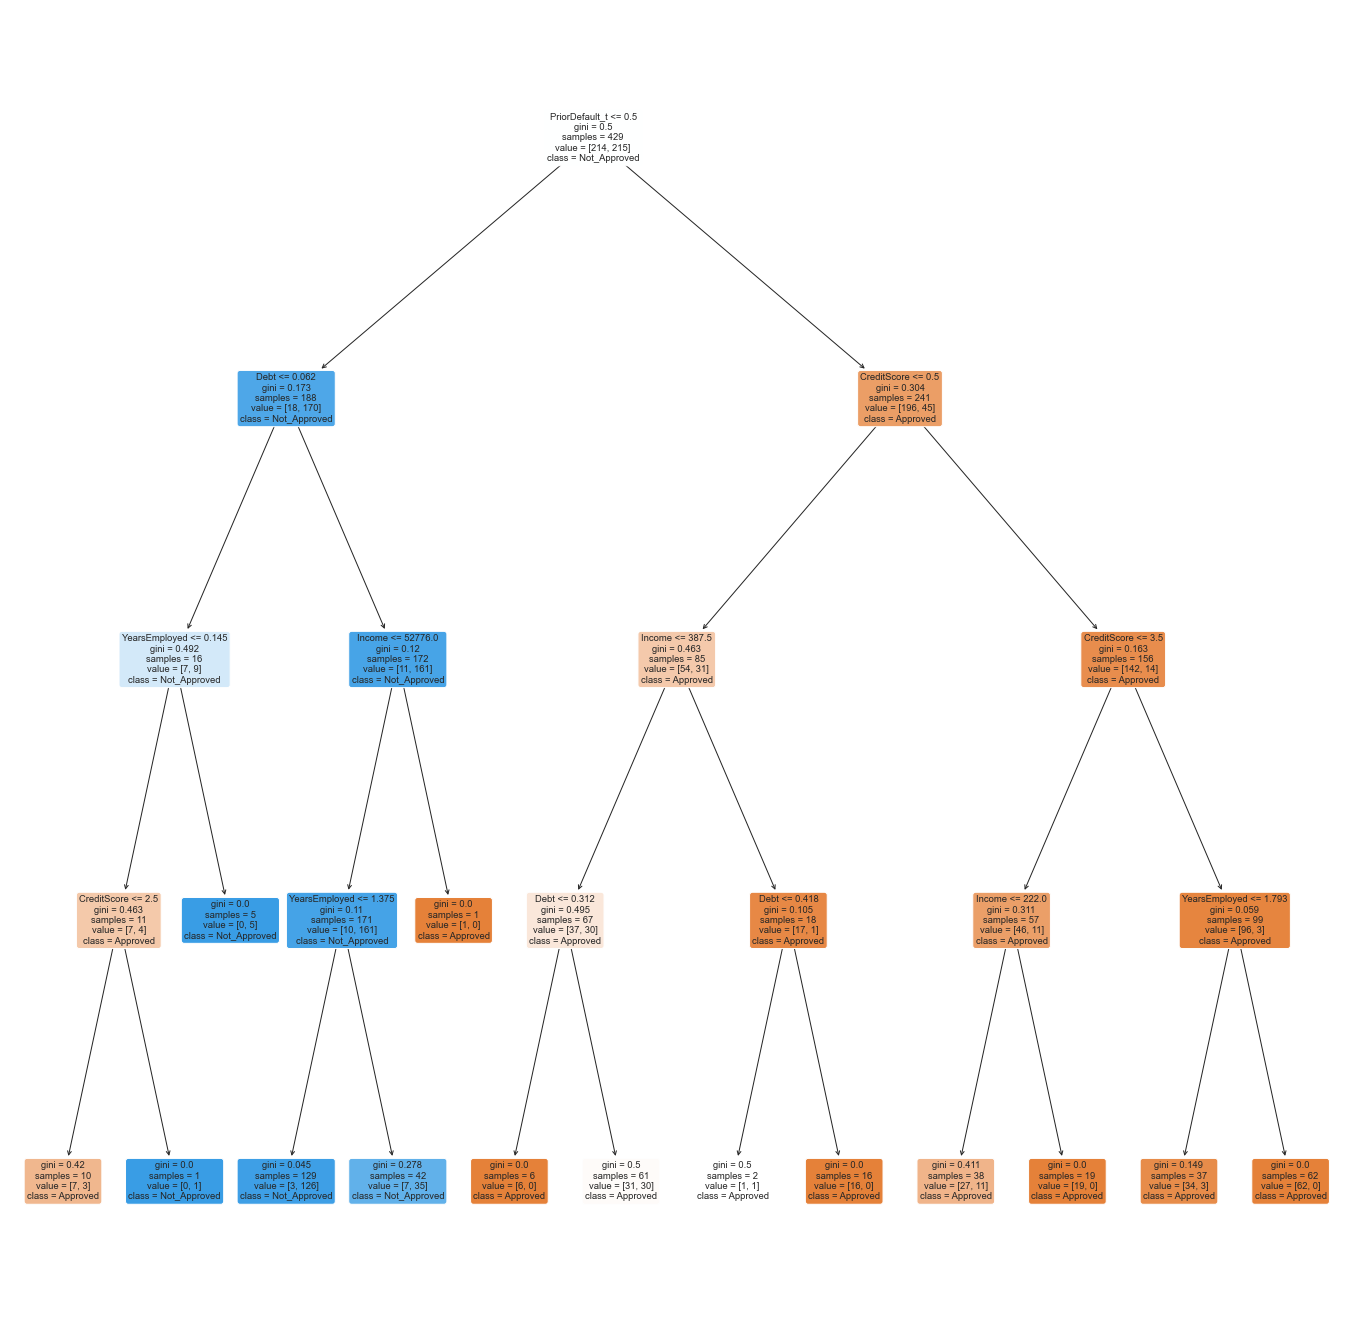

In [62]:
# Extract Response and Predictors
y = pd.DataFrame(creditData_ohe_up['Approved_Status'])
X = pd.DataFrame(creditData_ohe_up.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Approved","Not_Approved"])

Train Data
Accuracy  :	 0.8648018648018648

TPR Train :	 0.7767441860465116
TNR Train :	 0.9532710280373832

FPR Train :	 0.04672897196261682
FNR Train :	 0.22325581395348837

Precision: 0.8095
Recall: 0.9533
F-score: 0.8755


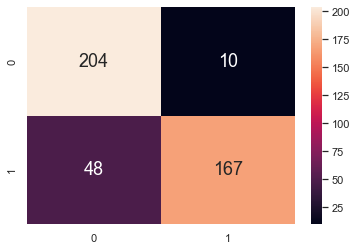

In [63]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

confusion_matrix_func(y_train,y_train_pred,'Train')

Test Data
Accuracy  :	 0.9135135135135135

TPR Test :	 0.8804347826086957
TNR Test :	 0.946236559139785

FPR Test :	 0.053763440860215055
FNR Test :	 0.11956521739130435

Precision: 0.8889
Recall: 0.9462
F-score: 0.9167


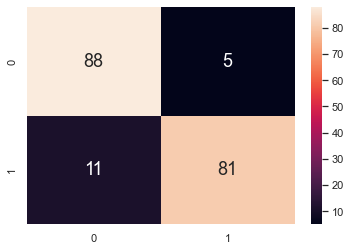

In [64]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

confusion_matrix_func(y_test,y_test_pred,'Test')

#### After applying resampling test accuracy went up by ~2% ( but train accuracy went down ~ 2%?) while TPR and TNR increased significantly (train accuracy went down ~ 2%?)